<a href="https://colab.research.google.com/github/KillerStrike17/EVA---Session5-Image-Normalization-L2-regularization/blob/master/Session5_DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load the libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.datasets import mnist

In [0]:
#function to show the misclassified images
def show_misclassified(X, Y, Y_pred, classes,columns=5, total=25,
                       pick_randomly=True, image_size_multiplier=4):
    y_true = np.argmax(Y, axis=1)
    yp = np.argmax(Y_pred, axis=1)
    
    #checking for misclassified images and storing in variable
    misclassified = y_true != yp
    
    #storing all the misclassified images with thier tags
    X = X[misclassified]
    Y = Y[misclassified]
    Y_pred = Y_pred[misclassified]
    y_true = y_true[misclassified]
    yp = yp[misclassified]
    
    total = min(total, len(X))
    rows = int(np.ceil(total / columns))

    indexes = np.random.choice(len(X), total, replace=False) if pick_randomly else list(range(0, total))

    X = np.take(X, indexes, axis=0)
    Y = np.take(Y, indexes, axis=0)
    Y_pred = np.take(Y_pred, indexes, axis=0)
    y_true = np.take(y_true, indexes, axis=0)
    yp = np.take(yp, indexes, axis=0)

    fig_height = rows * image_size_multiplier * 2
    fig_width = columns * image_size_multiplier
    
    #allocating space to plot all graphs
    fig = plt.figure(figsize=(fig_width, fig_height))
    plt.subplots_adjust(bottom=0.1, top=1.0)
    idx1 = 0
    idx2 = 0
    jdx = 0
    
    #printing all the misclassified images
    for row in range(rows):
        for column in range(columns):
            if idx1 >= len(X):
                break
            img = X[idx1]
            assert (len(img.shape) == 3 and img.shape[2] in [1, 3, 4]) or len(img.shape) == 2
            ax = fig.add_subplot(rows * 2, columns, jdx + 1, xticks=[], yticks=[])
            cmap = None
            if (len(img.shape) == 3 and img.shape[2] == 1) or len(img.shape) == 2:
                cmap = "binary"
            if len(img.shape) == 3 and img.shape[2] == 1:
                img = img.reshape((img.shape[0], img.shape[1]))
            ax.imshow(img, cmap=cmap)
            ax.set_xlabel("Predicted = %s, Actual = %s" % (classes[yp[idx1]], classes[y_true[idx1]]))
            idx1 += 1
            jdx += 1        
    plt.show()
    
#returning class labels
def get_mnist_labels():
    return list(range(0, 10))

In [0]:
#splitting data into training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


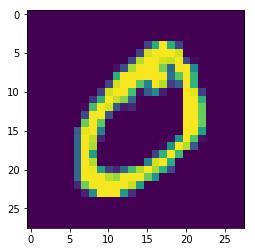

In [74]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
#displaying the training image
plt.imshow(X_train[1])

In [75]:
#reshaping the training and testing data
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print("Shape",X_train.shape[1])

Shape 28


In [0]:
#converting the pixel values to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
#Categorizing the labels
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [78]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [79]:
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen_validation = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
datagen_validation.fit(X_train)
#valid_datagen.fit(X_test)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

Statistics train=0.131 (0.308), test=0.133 (0.310)
Data Generator mean=0.131, std=0.308


In [80]:
#Developed Model
from keras.layers import Activation
from keras import regularizers
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1),kernel_regularizer=regularizers.l2(l=0.1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(l=0.1))) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu',kernel_regularizer=regularizers.l2(l=0.1))) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(l=0.1)))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(l=0.1)))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(l=0.1)))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(l=0.1)))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_50 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_50 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_51 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_51 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 10)        330       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [81]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
#Schedduler function
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#compiling the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

#saving path
filepath="model.hdf5"

#saving the best model
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

#training the model
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128), steps_per_epoch=X_train.shape[0]/128,
                    verbose=1,nb_epoch = 40,
                     callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)],
                     validation_data=datagen_validation.flow(X_test, Y_test,batch_size = 128), validation_steps = X_test.shape[0]/128)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=468.75, verbose=1, callbacks=[<keras.ca..., validation_data=<keras_pre..., validation_steps=78.125, epochs=40)`


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/468 [==============================] - 20s 43ms/step - loss: 1.2877 - acc: 0.8519 - val_loss: 0.6924 - val_acc: 0.9185

Epoch 00001: val_acc improved from -inf to 0.91850, saving model to model.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
469/468 [==============================] - 9s 19ms/step - loss: 0.4371 - acc: 0.9073 - val_loss: 0.3931 - val_acc: 0.9513

Epoch 00002: val_acc improved from 0.91850 to 0.95130, saving model to model.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
469/468 [==============================] - 9s 19ms/step - loss: 0.3744 - acc: 0.9193 - val_loss: 0.2648 - val_acc: 0.9611

Epoch 00003: val_acc improved from 0.95130 to 0.96110, saving model to model.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
469/468 [==============================] - 9s 19ms

Score:-  [0.059969704830646516, 0.9916]


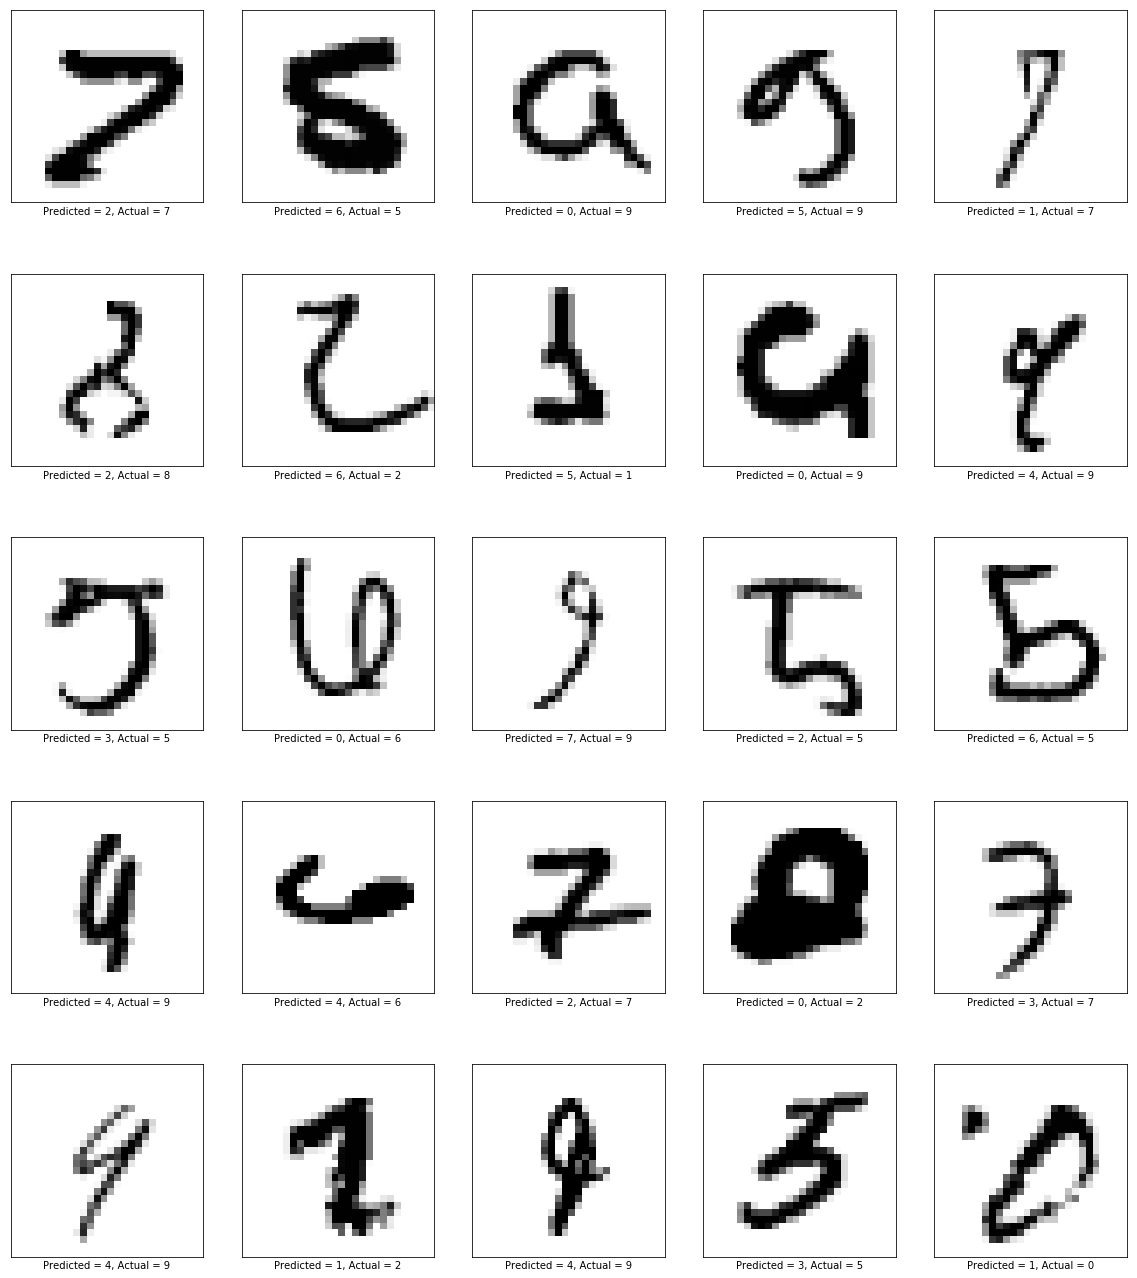

In [82]:
from keras.models import load_model
#loading the model
model = load_model('model.hdf5')
iterator = datagen_validation.flow(X_test, Y_test, batch_size=128, shuffle=False)
#evaluating the score

score = model.evaluate_generator(iterator,steps=len(iterator))
print("Score:- ",score)
iterator = datagen_validation.flow(X_test, Y_test, batch_size=128, shuffle=False)
predictions = model.predict_generator(iterator,steps=len(iterator))

#Printin the misclassified images
show_misclassified(X_test, Y_test, predictions[:len(Y_test)], 
                   classes=get_mnist_labels(),columns=5, total=25, 
                       pick_randomly=True, image_size_multiplier=4)